#                                                 Analyzing New York City(NYC) to open an Indian Restaurant

# 1.Introduction Section:

### 1.1 Business Problem: In this study we are analyzing neighborhoods of New York City , US. to open a new Indian Restaurant. 

 The City of New York, is the most populous city in the United States.  The five boroughs – Brooklyn, Queens, Manhattan, The Bronx, and Staten Island – were consolidated into a single city in 1898. The city and its metropolitan area constitute the premier gateway for legal immigration to the United States. According to the 2010 United States Census, the Asian Indian population in the United States grew from almost 1,678,765 in 2000 (0.6% of U.S. population) to 2,843,391 in 2010 (0.9% of U.S. population), a growth rate of 69.37%. Indians in the New York City metropolitan region constitute one of the largest and fastest growing ethnicities in the New York City metropolitan area of the United States. The New York City region is home to the largest Indian American population among metropolitan areas by a significant margin, enumerating 711,174 uniracial individuals by the 2013-2017 U.S. Census American Community Survey estimates.












 Of course, food and service are important to the success of a restaurant, but the location can be just as crucial. There need to be enough people who live in or pass through the area regularly to keep our business busy. This shows how important it is to start a restaurant in an area which is easily accessible and where you can attract your targeted audience easily. We analyse the neigborhoods in New York City to identify the most profitable area.










 When looking for a restaurant location, consider who else is doing business in the neighborhood. Are there already half a dozen restaurants with the same concept as yours? Is the area busy or full of empty storefronts? Successful businesses attract other successful businesses.


## 1.2 Target an audience: 


Why people would care about your problem or how your product can benefit them? No product without a customer. There is no film without a viewer. 

This study will help and give more information to:

•	Indian peoples who wants to know about the neighbourhood Indian Restaurants.

•	Business personnel who wants to invest or open an Indian Restaurant in New York City.

•	Data scientists who wants to analyse the neighborhoods of New York City.


## 2. Data Sources:

i) New York City has a total of 5 boroughs and 306 neighborhoods. In order to segment the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the latitude and longitude coordinates of each neighborhood. Use https://cocl.us/new_york_dataset to get all the information about the neighborhoods present in New York City.

ii) To get the information about New York City: https://en.wikipedia.org/wiki/New_York_City

iii) To get the information about densely populated area with Indians: https://en.wikipedia.org/wiki/Indians_in_the_New_York_City_metropolitan_region#Demographics

iv) The Foursquare Places API provides location based experiences with diverse information about venues, users, photos, and check-ins. To search for a specific type of venues, to explore a particular venue, to explore a Foursquare user, to explore a geographical location, and to get trending venues around a location in New York City we use (https://developer.foursquare.com/docs)



## 3. Data Section:

### a) Download and Explore the dataset

Ney York City has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 


run a `wget` command and access the data. So let's go ahead and do that.

In [1]:
!wget -q -O 'NYC_data.json' https://cocl.us/new_york_dataset
print('NYC Data Downloaded')

NYC Data Downloaded


Before we load the data and start exploring it, let's download all the libraries that we will need.

In [2]:
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
   
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

print('Folium imported')
print('Libraries imported.')



Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    altair-4.0.0               |             py_0         606 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be 

Load and Explore the dataset

In [3]:
with open('NYC_data.json') as json_data:
    NYC_data=json.load(json_data)


In [4]:
NYC_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Notice how all the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [5]:
NYC_neigh_data=NYC_data['features']
NYC_neigh_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

### b) Transform the data into pandas dataframe

In [6]:
# define a dataframe column:
column_names=['Borough','Neighborhood','Latitude','Longitude']
column_names

['Borough', 'Neighborhood', 'Latitude', 'Longitude']

In [7]:
# instantiate the dataframe
neighborhoods=pd.DataFrame(columns=column_names)
neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

Then let's loop through the data and fill the dataframe one row at a time.

In [8]:

for data in NYC_neigh_data:
    borough=neighborhood_name=data['properties']['borough']
    neighborhood_name=data['properties']['name']
    
    neighborhood_latlon=data['geometry']['coordinates']
    neighborhood_lat=neighborhood_latlon[1]
    neighborhood_lon=neighborhood_latlon[0]
    neighborhoods=neighborhoods.append({'Borough': borough,
                                      'Neighborhood': neighborhood_name,
                                      'Latitude': neighborhood_lat,
                                      'Longitude': neighborhood_lon}, ignore_index=True)
   

In [9]:
neighborhoods

Borough               Neighborhood   Latitude  Longitude
0            Bronx                  Wakefield  40.894705 -73.847201
1            Bronx                 Co-op City  40.874294 -73.829939
2            Bronx                Eastchester  40.887556 -73.827806
3            Bronx                  Fieldston  40.895437 -73.905643
4            Bronx                  Riverdale  40.890834 -73.912585
5            Bronx                Kingsbridge  40.881687 -73.902818
6        Manhattan                Marble Hill  40.876551 -73.910660
7            Bronx                   Woodlawn  40.898273 -73.867315
8            Bronx                    Norwood  40.877224 -73.879391
9            Bronx             Williamsbridge  40.881039 -73.857446
10           Bronx                 Baychester  40.866858 -73.835798
11           Bronx             Pelham Parkway  40.857413 -73.854756
12           Bronx                City Island  40.847247 -73.786488
13           Bronx               Bedford Park  40.870185 -73.885512
14           Bronx         University Heights  40.855727 -73.910416
15           Bronx             Morris Heights  40.847898 -73.919672
16           Bronx                    Fordham  40.860997 -73.896427
17           Bronx               East Tremont  40.842696 -73.887356
18           Bronx                 West Farms  40.839475 -73.877745
19           Bronx               High  Bridge  40.836623 -73.926102
20           Bronx                    Melrose  40.819754 -73.909422
21           Bronx                 Mott Haven  40.806239 -73.916100
22           Bronx                Port Morris  40.801664 -73.913221
23           Bronx                   Longwood  40.815099 -73.895788
24           Bronx                Hunts Point  40.809730 -73.883315
25           Bronx                 Morrisania  40.823592 -73.901506
26           Bronx                  Soundview  40.821012 -73.865746
27           Bronx               Clason Point  40.806551 -73.854144
28           Bronx                Throgs Neck  40.815109 -73.816350
29           Bronx               Country Club  40.844246 -73.824099
30           Bronx                Parkchester  40.837938 -73.856003
31           Bronx         Westchester Square  40.840619 -73.842194
32           Bronx                   Van Nest  40.843608 -73.866299
33           Bronx                Morris Park  40.847549 -73.850402
34           Bronx                    Belmont  40.857277 -73.888452
35           Bronx             Spuyten Duyvil  40.881395 -73.917190
36           Bronx            North Riverdale  40.908543 -73.904531
37           Bronx                 Pelham Bay  40.850641 -73.832074
38           Bronx              Schuylerville  40.826580 -73.826203
39           Bronx             Edgewater Park  40.821986 -73.813885
40           Bronx                Castle Hill  40.819014 -73.848027
41           Bronx                  Olinville  40.871371 -73.863324
42           Bronx             Pelham Gardens  40.862966 -73.841612
43           Bronx                  Concourse  40.834284 -73.915589
44           Bronx                  Unionport  40.829774 -73.850535
45           Bronx                   Edenwald  40.884561 -73.848083
46        Brooklyn                  Bay Ridge  40.625801 -74.030621
47        Brooklyn                Bensonhurst  40.611009 -73.995180
48        Brooklyn                Sunset Park  40.645103 -74.010316
49        Brooklyn                 Greenpoint  40.730201 -73.954241
50        Brooklyn                  Gravesend  40.595260 -73.973471
51        Brooklyn             Brighton Beach  40.576825 -73.965094
52        Brooklyn             Sheepshead Bay  40.586890 -73.943186
53        Brooklyn          Manhattan Terrace  40.614433 -73.957438
54        Brooklyn                   Flatbush  40.636326 -73.958401
55        Brooklyn              Crown Heights  40.670829 -73.943291
56        Brooklyn              East Flatbush  40.641718 -73.936103
57        Brooklyn                 Kensington  40.642382 -73.980421

Makes sure that the data frame has all 5 boroughs and 306 neighborhoods

In [10]:
print('The dataframe has {} boroughs and {} neighborhoods'.format(len(neighborhoods['Borough'].unique()),
                                                                 neighborhoods.shape[0]))

The dataframe has 5 boroughs and 306 neighborhoods


Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

### c) Scrape the wikipedia page to get the Indian Populations of 5 boroughs in the New York City

In [11]:
import urllib.request##
wiki="https://en.wikipedia.org/wiki/Indians_in_the_New_York_City_metropolitan_region"
page=urllib.request.urlopen(wiki)
from bs4 import BeautifulSoup
soup=BeautifulSoup(page, features='html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Indians in the New York City metropolitan region - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"Xf@SrgpAMFYAAGMJgU4AAAAS","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Indians_in_the_New_York_City_metropolitan_region","wgTitle":"Indians in the New York City metropolitan region","wgCurRevisionId":930460486,"wgRevisionId":930460486,"wgArticleId":44837185,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":nul

In [12]:
all_tables=soup.find_all('table')

In [13]:
right_table=soup.find_all('table',class_ ='wikitable sortable')
right_table

[<table class="wikitable sortable">
 <tbody><tr>
 <th>Rank
 </th>
 <th>Borough
 </th>
 <th>City
 </th>
 <th>Indian Americans
 </th>
 <th>Density of Indian Americans per square mile
 </th>
 <th>Percentage of Indian Americans in municipality's population
 </th></tr>
 <tr>
 <td align="center">1
 </td>
 <td><a href="/wiki/Queens" title="Queens">Queens</a> (2014)<sup class="reference" id="cite_ref-QueensIndians_33-0"><a href="#cite_note-QueensIndians-33">[33]</a></sup>
 </td>
 <td><a href="/wiki/New_York_City" title="New York City">New York City</a>
 </td>
 <td align="right"><span data-sort-value="7005144896000000000♠">144,896</span>
 </td>
 <td align="center"><span data-sort-value="7003132650000000000♠">1,326.5</span>
 </td>
 <td align="center"><span data-sort-value="7000620000000000000♠">6.2</span>
 </td></tr>
 <tr>
 <td align="center">2
 </td>
 <td><a href="/wiki/Brooklyn" title="Brooklyn">Brooklyn</a> (2012)
 </td>
 <td><a href="/wiki/New_York_City" title="New York City">New York City</

In [14]:
right_table=soup.find('table',{"class": 'wikitable sortable'})
right_table

<table class="wikitable sortable">
<tbody><tr>
<th>Rank
</th>
<th>Borough
</th>
<th>City
</th>
<th>Indian Americans
</th>
<th>Density of Indian Americans per square mile
</th>
<th>Percentage of Indian Americans in municipality's population
</th></tr>
<tr>
<td align="center">1
</td>
<td><a href="/wiki/Queens" title="Queens">Queens</a> (2014)<sup class="reference" id="cite_ref-QueensIndians_33-0"><a href="#cite_note-QueensIndians-33">[33]</a></sup>
</td>
<td><a href="/wiki/New_York_City" title="New York City">New York City</a>
</td>
<td align="right"><span data-sort-value="7005144896000000000♠">144,896</span>
</td>
<td align="center"><span data-sort-value="7003132650000000000♠">1,326.5</span>
</td>
<td align="center"><span data-sort-value="7000620000000000000♠">6.2</span>
</td></tr>
<tr>
<td align="center">2
</td>
<td><a href="/wiki/Brooklyn" title="Brooklyn">Brooklyn</a> (2012)
</td>
<td><a href="/wiki/New_York_City" title="New York City">New York City</a>
</td>
<td align="right"><span 

In [15]:
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
for row in right_table.findAll("tr"):
    cells = row.findAll('td')
    states = row.findAll('th')
    if len(cells)==6:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
        F.append(cells[5].find(text=True))

In [16]:
Ind_pop=pd.DataFrame(A,columns=['Rank'])
Ind_pop['Borough']=B
Ind_pop['City']=C
Ind_pop['Indian Americans']=D
Ind_pop['Density of Indian Americans per square mile']=E
Ind_pop['Percentage of Indian Americans in municipality population']=F
Ind_pop

Rank        Borough           City Indian Americans  \
0   1
         Queens  New York City          144,896   
1   2
       Brooklyn  New York City           25,270   
2   3
      Manhattan  New York City           24,359   
3   4
      The Bronx  New York City           16,748   
4   5
  Staten Island  New York City            6,646   
5    
   Total (2014)  New York City          227,994   

  Density of Indian Americans per square mile  \
0                                     1,326.5   
1                                       357.9   
2                                     1,060.9   
3                                       398.6   
4                                       113.6   
5                                       753.4   

  Percentage of Indian Americans in municipality population  
0                                                6.2         
1                                                1.0         
2                                                1.5         
3                                                1.2         
4                                                1.4         
5                                                2.7

It is important to get the population density of each borough for the analysis to open an Indian restaurant.   
The above table clearly shows the Indian population density of each borough with their respective percentage.     
This will help to find the more possible ways to opan a restaurant in a particular borough.

### d) Define Foursquare Credentials and Version

In [17]:
CLIENT_ID='QCNQH5SHRGLCXGCZODU5UKBSTM1EDIAX0EPTNWFLA1RZZ1BZ' # My Foursqare Id
CLIENT_SECRET='YKTTPST1MSMZCNZGL5CCGFIKLF0DTD1PEKCXD1POK1XGPQ0W' # My Foursquare Secret
VERSION='20180605'

print("The Credentials:" )
print("Client_Id:" + CLIENT_ID)
print("Client_Secret:" + CLIENT_SECRET)

The Credentials:
Client_Id:QCNQH5SHRGLCXGCZODU5UKBSTM1EDIAX0EPTNWFLA1RZZ1BZ
Client_Secret:YKTTPST1MSMZCNZGL5CCGFIKLF0DTD1PEKCXD1POK1XGPQ0W


In [18]:
address='New York City'
geolocator=Nominatim(user_agent='nyc_explorer')
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print('The geographical coordinate of New York City are {}, {}.'.format(latitude,longitude))



The geographical coordinate of New York City are 40.7127281, -74.0060152.


In [19]:
radius=1000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius)
results=requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e043b52f7706a001b0a1617'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Downtown Manhattan',
  'headerFullLocation': 'Downtown Manhattan, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 234,
  'suggestedBounds': {'ne': {'lat': 40.72172810900001,
    'lng': -73.99416384126839},
   'sw': {'lat': 40.70372809099999, 'lng': -74.0178665587316}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57f0689d498e7d49d9189369',
       'name': 'The Bar Room at Temple Court',
       'location': {'address': '123 Nassau St',
        'lat': 40.7114477287544,
        'lng': -74.00680157032005,
 

In [20]:
#Function to get the category

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']

    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [21]:
import json
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

name            categories        lat  \
0          The Bar Room at Temple Court             Hotel Bar  40.711448   
1        The Beekman - A Thompson Hotel                 Hotel  40.711173   
2             Alba Dry Cleaner & Tailor       Laundry Service  40.711434   
3                        City Hall Park                  Park  40.712415   
4          Gibney Dance Center Downtown          Dance Studio  40.713923   
5                       The Wooly Daily           Coffee Shop  40.712137   
6                             Augustine     French Restaurant  40.711310   
7             The Class by Taryn Toomey  Gym / Fitness Center  40.712753   
8                      Takahachi Bakery                Bakery  40.713653   
9  Four Seasons Hotel New York Downtown                 Hotel  40.712612   

         lng  
0 -74.006802  
1 -74.006702  
2 -74.006272  
3 -74.006724  
4 -74.005661  
5 -74.008395  
6 -74.006660  
7 -74.008734  
8 -74.008804  
9 -74.009380

In [22]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

30 venues were returned by Foursquare.


### e)  Explore neighborhoods in New York City

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Now write the code to run the above function on each neighborhood and create a new dataframe called *NYC_venues*.

In [24]:
LIMIT=100
NYC_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                             )



Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [25]:
NYC_venues.head(15)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0     Wakefield              40.894705              -73.847201   
1     Wakefield              40.894705              -73.847201   
2     Wakefield              40.894705              -73.847201   
3     Wakefield              40.894705              -73.847201   
4     Wakefield              40.894705              -73.847201   
5     Wakefield              40.894705              -73.847201   
6     Wakefield              40.894705              -73.847201   
7    Co-op City              40.874294              -73.829939   
8    Co-op City              40.874294              -73.829939   
9    Co-op City              40.874294              -73.829939   
10   Co-op City              40.874294              -73.829939   
11   Co-op City              40.874294              -73.829939   
12   Co-op City              40.874294              -73.829939   
13   Co-op City              40.874294              -73.829939   
14   Co-op City              40.874294              -73.829939   

                        Venue  Venue Latitude  Venue Longitude  \
0            Lollipops Gelato       40.894123       -73.845892   
1                    Rite Aid       40.896649       -73.844846   
2            Carvel Ice Cream       40.890487       -73.848568   
3                       Shell       40.894187       -73.845862   
4                     Dunkin'       40.890459       -73.849089   
5                      SUBWAY       40.890656       -73.849192   
6             Koss Quick Wash       40.891281       -73.849904   
7                    Rite Aid       40.870345       -73.828302   
8                 Dollar Tree       40.870125       -73.828989   
9              Capri II Pizza       40.876374       -73.829940   
10              Mattress Firm       40.872234       -73.828607   
11           Bagels on Bartow       40.870280       -73.828611   
12             Baskin Robbins       40.870045       -73.829578   
13                     Arby's       40.870280       -73.828611   
14  Food Universe Marketplace       40.876740       -73.828980   

          Venue Category  
0           Dessert Shop  
1               Pharmacy  
2         Ice Cream Shop  
3            Gas Station  
4             Donut Shop  
5         Sandwich Place  
6             Laundromat  
7               Pharmacy  
8         Discount Store  
9            Pizza Place  
10        Mattress Store  
11            Bagel Shop  
12        Ice Cream Shop  
13  Fast Food Restaurant  
14         Grocery Store

### Let's check the size of the resulting dataframe

In [26]:
print(NYC_venues.shape)


(10253, 7)


Let's check how many venues were returned for each neighborhood


In [27]:
NYC_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Allerton                                      34                      34   
Annadale                                      11                      11   
Arden Heights                                  5                       5   
Arlington                                      8                       8   
Arrochar                                      19                      19   
Arverne                                       17                      17   
Astoria                                      100                     100   
Astoria Heights                               13                      13   
Auburndale                                    20                      20   
Bath Beach                                    50                      50   
Battery Park City                             93                      93   
Bay Ridge                                     85                      85   
Bay Terrace                                   48                      48   
Baychester                                    24                      24   
Bayside                                       72                      72   
Bayswater                                      2                       2   
Bedford Park                                  34                      34   
Bedford Stuyvesant                            28                      28   
Beechhurst                                    12                      12   
Bellaire                                      10                      10   
Belle Harbor                                  17                      17   
Bellerose                                     22                      22   
Belmont                                      100                     100   
Bensonhurst                                   28                      28   
Bergen Beach                                   7                       7   
Blissville                                    19                      19   
Bloomfield                                     5                       5   
Boerum Hill                                   89                      89   
Borough Park                                  20                      20   
Breezy Point                                   3                       3   
Briarwood                                     10                      10   
Brighton Beach                                45                      45   
Broad Channel                                  5                       5   
Broadway Junction                             15                      15   
Bronxdale                                     12                      12   
Brooklyn Heights                             100                     100   
Brookville                                     1                       1   
Brownsville                                   19                      19   
Bulls Head                                    46                      46   
Bushwick                                      74                      74   
Butler Manor                                   6                       6   
Cambria Heights                               13                      13   
Canarsie                                       6                       6   
Carnegie Hill                                100                     100   
Carroll Gardens                              100                     100   
Castle Hill                                    9                       9   
Castleton Corners                             15                      15   
Central Harlem                                44                      44   
Charleston                                    31                      31   
Chelsea                                      108                     108   
Chinatown                                    100                     100   

### Let's find how many unique categories can be curated from all the returned values

In [28]:
print('There are {} unique categories.'.format(len(NYC_venues['Venue Category'].unique())))

There are 430 unique categories.


### f)  Analyze each Neighborhood

In [29]:
# one hot encoding
NYC_onehot = pd.get_dummies(NYC_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NYC_onehot['Neighborhood'] = NYC_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [NYC_onehot.columns[-1]] + list(NYC_onehot.columns[:-1])
NYC_onehot = NYC_onehot[fixed_columns]

NYC_onehot.head()




Yoga Studio  Accessories Store  Adult Boutique  Afghan Restaurant  \
0            0                  0               0                  0   
1            0                  0               0                  0   
2            0                  0               0                  0   
3            0                  0               0                  0   
4            0                  0               0                  0   

   African Restaurant  American Restaurant  Antique Shop  Arcade  \
0                   0                    0             0       0   
1                   0                    0             0       0   
2                   0                    0             0       0   
3                   0                    0             0       0   
4                   0                    0             0       0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       0            0           0   
4                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0                   0           0                      0                    0   
1                   0           0                      0                    0   
2                   0           0                      0                    0   
3                   0           0                      0                    0   
4                   0           0                      0                    0   

   Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0              0                0          0           0           0       0   
1              0                0          0           0           0       0   
2              0                0          0           0           0       0   
3              0                0          0           0           0       0   
4              0                0          0           0           0       0   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  Bath House  \
0     0    0               0                 0                 0           0   
1     0    0               0                 0                 0           0   
2     0    0               0                 0                 0           0   
3     0    0               0                 0                 0           0   
4     0    0               0                 0                 0           0   

   Beach  Beach Bar  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0      0          0                0         0            0           0   
1      0          0                0         0            0           0   
2      0          0                0         0            0           0   
3      0          0                0         0            0           0   
4      0          0                0         0            0           0   

   Big Box Store  Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  \
0              0                         0          0           0       0   
1              0                         0          0           0       0   
2              0                         0          0           0       0   
3              0                         0          0           0       0   
4              0                         0    

In [30]:
print('The size of new dataframe:')
NYC_onehot.shape

The size of new dataframe:


(10253, 430)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [31]:
NYC_grouped=NYC_onehot.groupby('Neighborhood').mean().reset_index()
NYC_grouped

Neighborhood  Yoga Studio  Accessories Store  \
0                     Allerton     0.000000           0.000000   
1                     Annadale     0.000000           0.000000   
2                Arden Heights     0.000000           0.000000   
3                    Arlington     0.000000           0.000000   
4                     Arrochar     0.000000           0.000000   
5                      Arverne     0.000000           0.000000   
6                      Astoria     0.000000           0.000000   
7              Astoria Heights     0.000000           0.000000   
8                   Auburndale     0.000000           0.000000   
9                   Bath Beach     0.000000           0.000000   
10           Battery Park City     0.000000           0.000000   
11                   Bay Ridge     0.000000           0.000000   
12                 Bay Terrace     0.000000           0.020833   
13                  Baychester     0.000000           0.000000   
14                     Bayside     0.013889           0.000000   
15                   Bayswater     0.000000           0.000000   
16                Bedford Park     0.000000           0.000000   
17          Bedford Stuyvesant     0.000000           0.000000   
18                  Beechhurst     0.083333           0.000000   
19                    Bellaire     0.000000           0.000000   
20                Belle Harbor     0.000000           0.000000   
21                   Bellerose     0.000000           0.000000   
22                     Belmont     0.000000           0.000000   
23                 Bensonhurst     0.000000           0.000000   
24                Bergen Beach     0.000000           0.000000   
25                  Blissville     0.000000           0.000000   
26                  Bloomfield     0.000000           0.000000   
27                 Boerum Hill     0.022472           0.000000   
28                Borough Park     0.000000           0.000000   
29                Breezy Point     0.000000           0.000000   
30                   Briarwood     0.000000           0.000000   
31              Brighton Beach     0.000000           0.000000   
32               Broad Channel     0.000000           0.000000   
33           Broadway Junction     0.000000           0.000000   
34                   Bronxdale     0.000000           0.000000   
35            Brooklyn Heights     0.050000           0.000000   
36                  Brookville     0.000000           0.000000   
37                 Brownsville     0.000000           0.000000   
38                  Bulls Head     0.000000           0.000000   
39                    Bushwick     0.000000           0.000000   
40                Butler Manor     0.000000           0.000000   
41             Cambria Heights     0.000000           0.000000   
42                    Canarsie     0.000000           0.000000   
43               Carnegie Hill     0.030000           0.000000   
44             Carroll Gardens     0.000000           0.000000   
45                 Castle Hill     0.000000           0.000000   
46           Castleton Corners     0.000000           0.000000   
47              Central Harlem     0.000000           0.000000   
48                  Charleston     0.000000           0.000000   
49                     Chelsea     0.000000           0.000000   
50                   Chinatown     0.000000           0.000000   
51                 City Island     0.000000           0.000000   
52                   City Line     0.000000           0.000000   
53                Civic Center     0.030000           0.000000   
54           Claremont Village     0.000000           0.000000   
55                Clason Point     0.000000           0.000000   
56                     Clifton     0.000000           0.000000   
57                     Clinton     0.000000           0.000000   
58                Clinton Hill     0.032609           0.000000   
59                  Co-op City     0.000000           0.00

In [32]:
NYC_grouped.shape



(302, 430)

In [33]:
print(NYC_venues['Venue Category'].value_counts())

Pizza Place                                 433
Italian Restaurant                          316
Coffee Shop                                 283
Deli / Bodega                               259
Chinese Restaurant                          223
Bakery                                      221
Bar                                         219
Sandwich Place                              180
Mexican Restaurant                          178
Pharmacy                                    178
American Restaurant                         175
Grocery Store                               170
Park                                        167
Donut Shop                                  167
Café                                        165
Ice Cream Shop                              149
Bank                                        146
Gym / Fitness Center                        131
Gym                                         119
Supermarket                                 117
Sushi Restaurant                        

## 3. Exploratory Data Analysis

a)Folium Library and Leaflet Map
Folium is a python library,using here to draw an interactive leaflet map using coordinate data.

In [34]:
# create map of New York using latitude and longitude values
map_NYC = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{},{}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NYC)  
    
map_NYC

### b) Relationship between Neighborhood and Indian Restaurant


Extract Neighborhood and Indian Restauarant columns from NYC_grouped dataframe and store it in new dataframe 

In [35]:
NYC_relation=NYC_grouped[['Neighborhood', 'Indian Restaurant']]
NYC_relation

Neighborhood  Indian Restaurant
0                     Allerton           0.000000
1                     Annadale           0.000000
2                Arden Heights           0.000000
3                    Arlington           0.000000
4                     Arrochar           0.000000
5                      Arverne           0.000000
6                      Astoria           0.020000
7              Astoria Heights           0.000000
8                   Auburndale           0.000000
9                   Bath Beach           0.020000
10           Battery Park City           0.000000
11                   Bay Ridge           0.011765
12                 Bay Terrace           0.000000
13                  Baychester           0.000000
14                     Bayside           0.041667
15                   Bayswater           0.000000
16                Bedford Park           0.000000
17          Bedford Stuyvesant           0.000000
18                  Beechhurst           0.000000
19                    Bellaire           0.000000
20                Belle Harbor           0.000000
21                   Bellerose           0.000000
22                     Belmont           0.000000
23                 Bensonhurst           0.000000
24                Bergen Beach           0.000000
25                  Blissville           0.000000
26                  Bloomfield           0.000000
27                 Boerum Hill           0.011236
28                Borough Park           0.000000
29                Breezy Point           0.000000
30                   Briarwood           0.100000
31              Brighton Beach           0.000000
32               Broad Channel           0.000000
33           Broadway Junction           0.000000
34                   Bronxdale           0.000000
35            Brooklyn Heights           0.010000
36                  Brookville           0.000000
37                 Brownsville           0.000000
38                  Bulls Head           0.000000
39                    Bushwick           0.013514
40                Butler Manor           0.000000
41             Cambria Heights           0.000000
42                    Canarsie           0.000000
43               Carnegie Hill           0.020000
44             Carroll Gardens           0.000000
45                 Castle Hill           0.000000
46           Castleton Corners           0.000000
47              Central Harlem           0.000000
48                  Charleston           0.000000
49                     Chelsea           0.009259
50                   Chinatown           0.000000
51                 City Island           0.000000
52                   City Line           0.000000
53                Civic Center           0.010000
54           Claremont Village           0.000000
55                Clason Point           0.000000
56                     Clifton           0.000000
57                     Clinton           0.000000
58                Clinton Hill           0.032609
59                  Co-op City           0.000000
60                 Cobble Hill           0.010000
61               College Point           0.000000
62                     Concord           0.000000
63                   Concourse           0.000000
64           Concourse Village           0.025000
65                Coney Island           0.000000
66                      Corona           0.000000
67                Country Club           0.000000
68               Crown Heights           0.000000
69               Cypress Hills           0.000000
70                 Ditmas Park           0.000000
71                Dongan Hills           0.000000
72                  Douglaston           0.000000
73                    Downtown           0.000000
74                       Dumbo           0.000000
75               Dyker Heights           0.000000
76               East Elmhurst           0.000000
77               East Flatbush           0.000000
78                 East Harlem           0.000000
79               E

In [36]:
NYC_merged=pd.merge(neighborhoods,NYC_relation,on='Neighborhood')
NYC_merged

Borough               Neighborhood   Latitude  Longitude  \
0            Bronx                  Wakefield  40.894705 -73.847201   
1            Bronx                 Co-op City  40.874294 -73.829939   
2            Bronx                Eastchester  40.887556 -73.827806   
3            Bronx                  Fieldston  40.895437 -73.905643   
4            Bronx                  Riverdale  40.890834 -73.912585   
5            Bronx                Kingsbridge  40.881687 -73.902818   
6        Manhattan                Marble Hill  40.876551 -73.910660   
7            Bronx                   Woodlawn  40.898273 -73.867315   
8            Bronx                    Norwood  40.877224 -73.879391   
9            Bronx             Williamsbridge  40.881039 -73.857446   
10           Bronx                 Baychester  40.866858 -73.835798   
11           Bronx             Pelham Parkway  40.857413 -73.854756   
12           Bronx                City Island  40.847247 -73.786488   
13           Bronx               Bedford Park  40.870185 -73.885512   
14           Bronx         University Heights  40.855727 -73.910416   
15           Bronx             Morris Heights  40.847898 -73.919672   
16           Bronx                    Fordham  40.860997 -73.896427   
17           Bronx               East Tremont  40.842696 -73.887356   
18           Bronx                 West Farms  40.839475 -73.877745   
19           Bronx               High  Bridge  40.836623 -73.926102   
20           Bronx                    Melrose  40.819754 -73.909422   
21           Bronx                 Mott Haven  40.806239 -73.916100   
22           Bronx                Port Morris  40.801664 -73.913221   
23           Bronx                   Longwood  40.815099 -73.895788   
24           Bronx                Hunts Point  40.809730 -73.883315   
25           Bronx                 Morrisania  40.823592 -73.901506   
26           Bronx                  Soundview  40.821012 -73.865746   
27           Bronx               Clason Point  40.806551 -73.854144   
28           Bronx                Throgs Neck  40.815109 -73.816350   
29           Bronx               Country Club  40.844246 -73.824099   
30           Bronx                Parkchester  40.837938 -73.856003   
31           Bronx         Westchester Square  40.840619 -73.842194   
32           Bronx                   Van Nest  40.843608 -73.866299   
33           Bronx                Morris Park  40.847549 -73.850402   
34           Bronx                    Belmont  40.857277 -73.888452   
35           Bronx             Spuyten Duyvil  40.881395 -73.917190   
36           Bronx            North Riverdale  40.908543 -73.904531   
37           Bronx                 Pelham Bay  40.850641 -73.832074   
38           Bronx              Schuylerville  40.826580 -73.826203   
39           Bronx             Edgewater Park  40.821986 -73.813885   
40           Bronx                Castle Hill  40.819014 -73.848027   
41           Bronx                  Olinville  40.871371 -73.863324   
42           Bronx             Pelham Gardens  40.862966 -73.841612   
43           Bronx                  Concourse  40.834284 -73.915589   
44           Bronx                  Unionport  40.829774 -73.850535   
45           Bronx                   Edenwald  40.884561 -73.848083   
46        Brooklyn                  Bay Ridge  40.625801 -74.030621   
47        Brooklyn                Bensonhurst  40.611009 -73.995180   
48        Brooklyn                Sunset Park  40.645103 -74.010316   
49        Brooklyn                 Greenpoint  40.730201 -73.954241   
50        Brooklyn                  Gravesend  40.595260 -73.973471   
51        Brooklyn             Brighton Beach  40.576825 -73.965094   
52        Brooklyn             Sheepshead Bay  40.586890 -73.943186   
53        Brooklyn          Manhattan Terrace  40.614433 -73.957438   
54        Brooklyn                   Flatbush  40.636326 -73.958401   
55        Brooklyn              Cro

### c)Visualize the Boroughs with Indian Restaurant

This will shows the boroughs with densely populated Indian Restaurant


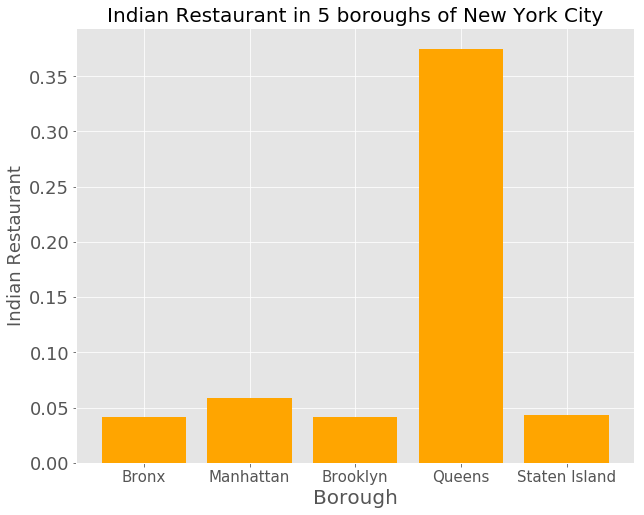

In [37]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

plt.figure(figsize = (10,8))
plt.bar(NYC_merged['Borough'], NYC_merged['Indian Restaurant'], color = 'orange')
plt.title("Indian Restaurant in 5 boroughs of New York City", fontsize = '20')
plt.xlabel('Borough', fontsize = '20')
plt.ylabel('Indian Restaurant', fontsize = '18')
plt.xticks(fontsize='15')
plt.yticks(fontsize='18')
plt.savefig('pdtor.jpg')
plt.show()

Lets visualize the neighborhood with Indian Restaurants

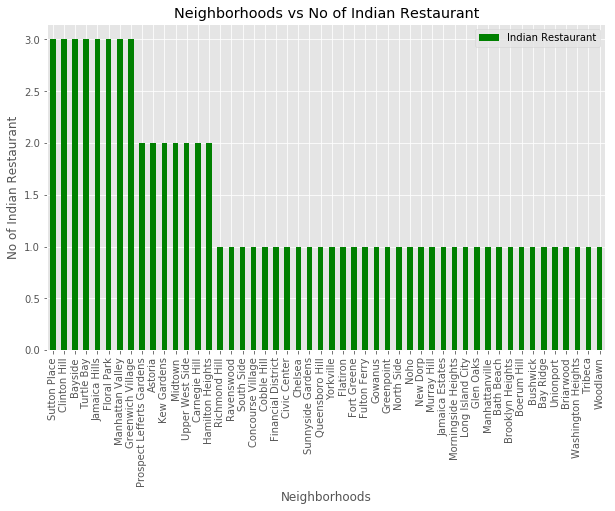

In [38]:
graph = pd.DataFrame(NYC_onehot.groupby('Neighborhood')['Indian Restaurant'].sum())
graph = graph.sort_values(by ='Indian Restaurant', ascending=False)
graph.iloc[:50].plot(kind='bar', figsize=(10,6),color='green')
plt.xlabel("Neighborhoods")
plt.ylabel("No of Indian Restaurant")
plt.title("Neighborhoods vs No of Indian Restaurant")
plt.show()

In [71]:
NYC_relation['split_neighborhoods'] = NYC_relation['Neighborhood'].str.split(',') 
NYC_relation.drop(columns=['Neighborhood'],inplace=True,axis=1)
NYC_relation= NYC_relation.split_neighborhoods.apply(pd.Series).merge(NYC_relation, left_index = True, right_index = True).drop(["split_neighborhoods"], axis = 1)\
                    .melt(id_vars = ['Indian Restaurant'], value_name = "Neighborhood").drop("variable", axis = 1).dropna()

NYC_relation.reset_index()
NYC_relation

Indian Restaurant               Neighborhood
0              0.000000                   Allerton
1              0.000000                   Annadale
2              0.000000              Arden Heights
3              0.000000                  Arlington
4              0.000000                   Arrochar
5              0.000000                    Arverne
6              0.020000                    Astoria
7              0.000000            Astoria Heights
8              0.000000                 Auburndale
9              0.020000                 Bath Beach
10             0.000000          Battery Park City
11             0.011765                  Bay Ridge
12             0.000000                Bay Terrace
13             0.000000                 Baychester
14             0.041667                    Bayside
15             0.000000                  Bayswater
16             0.000000               Bedford Park
17             0.000000         Bedford Stuyvesant
18             0.000000                 Beechhurst
19             0.000000                   Bellaire
20             0.000000               Belle Harbor
21             0.000000                  Bellerose
22             0.000000                    Belmont
23             0.000000                Bensonhurst
24             0.000000               Bergen Beach
25             0.000000                 Blissville
26             0.000000                 Bloomfield
27             0.011236                Boerum Hill
28             0.000000               Borough Park
29             0.000000               Breezy Point
30             0.100000                  Briarwood
31             0.000000             Brighton Beach
32             0.000000              Broad Channel
33             0.000000          Broadway Junction
34             0.000000                  Bronxdale
35             0.010000           Brooklyn Heights
36             0.000000                 Brookville
37             0.000000                Brownsville
38             0.000000                 Bulls Head
39             0.013514                   Bushwick
40             0.000000               Butler Manor
41             0.000000            Cambria Heights
42             0.000000                   Canarsie
43             0.020000              Carnegie Hill
44             0.000000            Carroll Gardens
45             0.000000                Castle Hill
46             0.000000          Castleton Corners
47             0.000000             Central Harlem
48             0.000000                 Charleston
49             0.009259                    Chelsea
50             0.000000                  Chinatown
51             0.000000                City Island
52             0.000000                  City Line
53             0.010000               Civic Center
54             0.000000          Claremont Village
55             0.000000               Clason Point
56             0.000000                    Clifton
57             0.000000                    Clinton
58             0.032609               Clinton Hill
59             0.000000                 Co-op City
60             0.010000                Cobble Hill
61             0.000000              College Point
62             0.000000                    Concord
63             0.000000                  Concourse
64             0.025000          Concourse Village
65             0.000000               Coney Island
66             0.000000                     Corona
67             0.000000               Country Club
68             0.000000              Crown Heights
69             0.000000              Cypress Hills
70             0.000000                Ditmas Park
71             0.000000               Dongan Hills
72             0.000000                 Douglaston
73             0.000000                   Downtown
74             0.000000                      Dumbo
75             0.000000              Dyker Heights
76             0.000000              East Elmhurst
77             0.000000     

## 4. Predictive Modelling

### a) Clustering Neighborhoods of New York City

First step in K-means clustering is to identify best K value meaning the number of clusters in a given dataset. 

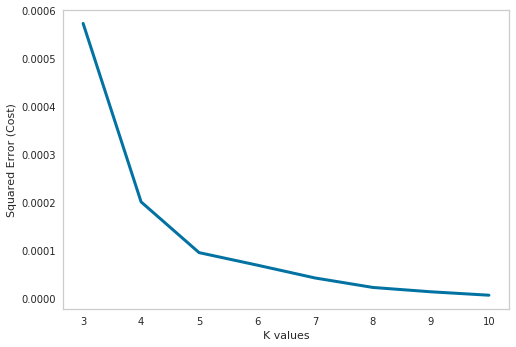

In [72]:

from sklearn.cluster import KMeans

NYC_relation_clustering = NYC_relation.drop('Neighborhood', 1)


error_cost = []

for i in range(3,11):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(NYC_relation_clustering)
    except ValueError:
        print("error on line",i)
    
    
    
    
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)

#plot the K values aganist the squared error cost
plt.plot(range(3,11), error_cost, color='b', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

In [73]:
!conda install -c districtdatalabs yellowbrick

from yellowbrick.cluster import KElbowVisualizer

Solving environment: done

# All requested packages already installed.



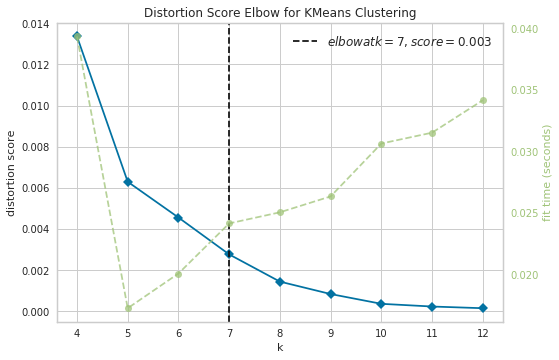

In [60]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,13))

visualizer.fit(NYC_relation_clustering)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

From the above visualizer it is clear that 7 is the best value.


Run *k*-means to cluster the neighborhood into 7 clusters.

In [61]:
kclusters = 7

NYC_relation_clustering = NYC_relation.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NYC_relation_clustering)

kmeans.labels_

array([0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 5, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 5, 0, 0, 3, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 4, 0, 5, 0, 0, 0, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 1, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0,
       0, 2, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 5, 0, 0, 2, 0, 0, 0, 5, 0, 0, 5, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 5, 0, 4, 0, 0, 0, 0, 0, 5, 0, 4, 2, 0, 0, 4, 0, 0, 0, 0, 5, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,

In [62]:
# add clustering labels

NYC_relation.insert(0, 'Cluster Labels', kmeans.labels_)
NYC_merged = neighborhoods

NYC_merged = NYC_merged.join(NYC_relation.set_index('Neighborhood'), on='Neighborhood')
NYC_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
NYC_merged.reset_index(drop=True, inplace=True)
NYC_merged['Cluster Labels'].astype(int)
NYC_merged.head()




Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
0   Bronx    Wakefield  40.894705 -73.847201               0   
1   Bronx   Co-op City  40.874294 -73.829939               0   
2   Bronx  Eastchester  40.887556 -73.827806               0   
3   Bronx    Fieldston  40.895437 -73.905643               0   
4   Bronx    Riverdale  40.890834 -73.912585               0   

   Indian Restaurant  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0

Finally, let's visualize the resulting clusters

In [74]:

import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, width='90%', height='70%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NYC_merged['Latitude'], NYC_merged['Longitude'], NYC_merged['Neighborhood'], NYC_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters



### b) Examine Clusters

Cluster 0 contains all the neighborhoods which has least number of Indian restaurants. It is shown in red color in the map

In [64]:
NYC_merged.loc[NYC_merged['Cluster Labels'] == 0]


Borough          Neighborhood   Latitude  Longitude  \
0            Bronx             Wakefield  40.894705 -73.847201   
1            Bronx            Co-op City  40.874294 -73.829939   
2            Bronx           Eastchester  40.887556 -73.827806   
3            Bronx             Fieldston  40.895437 -73.905643   
4            Bronx             Riverdale  40.890834 -73.912585   
5            Bronx           Kingsbridge  40.881687 -73.902818   
6        Manhattan           Marble Hill  40.876551 -73.910660   
8            Bronx               Norwood  40.877224 -73.879391   
9            Bronx        Williamsbridge  40.881039 -73.857446   
10           Bronx            Baychester  40.866858 -73.835798   
11           Bronx        Pelham Parkway  40.857413 -73.854756   
12           Bronx           City Island  40.847247 -73.786488   
13           Bronx          Bedford Park  40.870185 -73.885512   
14           Bronx    University Heights  40.855727 -73.910416   
15           Bronx        Morris Heights  40.847898 -73.919672   
16           Bronx               Fordham  40.860997 -73.896427   
17           Bronx          East Tremont  40.842696 -73.887356   
18           Bronx            West Farms  40.839475 -73.877745   
19           Bronx          High  Bridge  40.836623 -73.926102   
20           Bronx               Melrose  40.819754 -73.909422   
21           Bronx            Mott Haven  40.806239 -73.916100   
22           Bronx           Port Morris  40.801664 -73.913221   
23           Bronx              Longwood  40.815099 -73.895788   
24           Bronx           Hunts Point  40.809730 -73.883315   
25           Bronx            Morrisania  40.823592 -73.901506   
26           Bronx             Soundview  40.821012 -73.865746   
27           Bronx          Clason Point  40.806551 -73.854144   
28           Bronx           Throgs Neck  40.815109 -73.816350   
29           Bronx          Country Club  40.844246 -73.824099   
30           Bronx           Parkchester  40.837938 -73.856003   
31           Bronx    Westchester Square  40.840619 -73.842194   
32           Bronx              Van Nest  40.843608 -73.866299   
33           Bronx           Morris Park  40.847549 -73.850402   
34           Bronx               Belmont  40.857277 -73.888452   
35           Bronx        Spuyten Duyvil  40.881395 -73.917190   
36           Bronx       North Riverdale  40.908543 -73.904531   
37           Bronx            Pelham Bay  40.850641 -73.832074   
38           Bronx         Schuylerville  40.826580 -73.826203   
39           Bronx        Edgewater Park  40.821986 -73.813885   
40           Bronx           Castle Hill  40.819014 -73.848027   
41           Bronx             Olinville  40.871371 -73.863324   
42           Bronx        Pelham Gardens  40.862966 -73.841612   
43           Bronx             Concourse  40.834284 -73.915589   
45           Bronx              Edenwald  40.884561 -73.848083   
47        Brooklyn           Bensonhurst  40.611009 -73.995180   
48        Brooklyn           Sunset Park  40.645103 -74.010316   
50        Brooklyn             Gravesend  40.595260 -73.973471   
51        Brooklyn        Brighton Beach  40.576825 -73.965094   
52        Brooklyn        Sheepshead Bay  40.586890 -73.943186   
53        Brooklyn     Manhattan Terrace  40.614433 -73.957438   
54        Brooklyn              Flatbush  40.636326 -73.958401   
55        Brooklyn         Crown Heights  40.670829 -73.943291   
56        Brooklyn         East Flatbush  40.641718 -73.936103   
57        Brooklyn            Kensington  40.642382 -73.980421   
58        Brooklyn       Windsor Terrace  40.656946 -73.980073   
59        Brooklyn      Prospect Heights  40.676822 -73.964859   
60        Brooklyn           Brownsville  40.663950 -73.910235   
61        Brooklyn          Williamsburg  40.707144 -73.958115   
63        Brooklyn    Bedford Stuyvesant  40.687232 -73.941785   
66        Brooklyn       Carroll Gardens  40.680540

Cluster 1 contains the neighborhoods which is sparsely populated with Indian restaurants. It is shown in purple color in the map.

In [65]:
NYC_merged.loc[NYC_merged['Cluster Labels'] == 1]

Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
181  Queens  Floral Park  40.741378 -73.708847               1   

     Indian Restaurant  
181              0.375

Cluster 2 contains all the neighborhoods which is medium populated with Indian restaurants. It is shown in blue color in the map.

In [66]:
NYC_merged.loc[NYC_merged['Cluster Labels'] == 2]

Borough               Neighborhood   Latitude  Longitude  \
7            Bronx                   Woodlawn  40.898273 -73.867315   
44           Bronx                  Unionport  40.829774 -73.850535   
88        Brooklyn  Prospect Lefferts Gardens  40.658420 -73.954899   
103      Manhattan           Hamilton Heights  40.823604 -73.949688   
124      Manhattan           Manhattan Valley  40.797307 -73.964286   
136         Queens                Kew Gardens  40.705179 -73.829819   
137         Queens              Richmond Hill  40.697947 -73.831833   
151         Queens                    Bayside  40.766041 -73.774274   
155         Queens                  Glen Oaks  40.749441 -73.715481   
184         Queens            Queensboro Hill  40.744572 -73.825809   
186         Queens                 Ravenswood  40.761705 -73.931575   
211  Staten Island                   New Dorp  40.572572 -74.116479   

     Cluster Labels  Indian Restaurant  
7                 2           0.041667  
44                2           0.041667  
88                2           0.041667  
103               2           0.034483  
124               2           0.058824  
136               2           0.044444  
137               2           0.041667  
151               2           0.041667  
155               2           0.043478  
184               2           0.043478  
186               2           0.037037  
211               2           0.043478

Cluster 3 contains all the neighborhoods which is medium populated with Indian restaurants. It is shown in sky blue color in the map.

In [67]:
NYC_merged.loc[NYC_merged['Cluster Labels'] == 3]

Borough   Neighborhood   Latitude  Longitude  Cluster Labels  \
159  Queens      Briarwood  40.710935 -73.811748               3   
263  Queens  Jamaica Hills  40.711460 -73.796465               3   

     Indian Restaurant  
159           0.100000  
263           0.136364

Cluster 4 contains all the neighborhoods which is more than medium populated with Indian restaurants. It is shown in radium color in the map.

In [68]:
NYC_merged.loc[NYC_merged['Cluster Labels'] == 4]

Borough         Neighborhood   Latitude  Longitude  Cluster Labels  \
79    Brooklyn           Bath Beach  40.599519 -73.998752               4   
84    Brooklyn         Clinton Hill  40.693229 -73.967843               4   
104  Manhattan       Manhattanville  40.816934 -73.957385               4   
111  Manhattan      Upper West Side  40.787658 -73.977059               4   
114  Manhattan              Midtown  40.754691 -73.981669               4   
117  Manhattan    Greenwich Village  40.726933 -73.999914               4   
125  Manhattan  Morningside Heights  40.808000 -73.963896               4   
129     Queens              Astoria  40.768509 -73.915654               4   
247  Manhattan        Carnegie Hill  40.782683 -73.953256               4   
268      Bronx    Concourse Village  40.824780 -73.915847               4   
271  Manhattan         Sutton Place  40.760280 -73.963556               4   
273  Manhattan           Turtle Bay  40.752042 -73.967708               4   

     Indian Restaurant  
79            0.020000  
84            0.032609  
104           0.023810  
111           0.020000  
114           0.020000  
117           0.030000  
125           0.025000  
129           0.020000  
247           0.020000  
268           0.025000  
271           0.030000  
273           0.030000

Cluster 5 contains all the neighborhoods which is densely populated with Indian restaurants. It is shown in light green color in the map

In [54]:
NYC_merged.loc[NYC_merged['Cluster Labels'] == 5]

Borough        Neighborhood   Latitude  Longitude  Cluster Labels  \
46        Brooklyn           Bay Ridge  40.625801 -74.030621               5   
49        Brooklyn          Greenpoint  40.730201 -73.954241               5   
62        Brooklyn            Bushwick  40.698116 -73.925258               5   
64        Brooklyn    Brooklyn Heights  40.695864 -73.993782               5   
65        Brooklyn         Cobble Hill  40.687920 -73.998561               5   
68        Brooklyn             Gowanus  40.673931 -73.994441               5   
69        Brooklyn         Fort Greene  40.688527 -73.972906               5   
87        Brooklyn         Boerum Hill  40.685683 -73.983748               5   
96        Brooklyn          North Side  40.714823 -73.958809               5   
97        Brooklyn          South Side  40.710861 -73.958001               5   
101      Manhattan  Washington Heights  40.851903 -73.936900               5   
108      Manhattan           Yorkville  40.775930 -73.947118               5   
115      Manhattan         Murray Hill  40.748303 -73.978332               5   
116      Manhattan             Chelsea  40.744035 -74.003116               5   
120      Manhattan             Tribeca  40.721522 -74.010683               5   
128      Manhattan  Financial District  40.707107 -74.010665               5   
139         Queens    Long Island City  40.750217 -73.939202               5   
180         Queens         Murray Hill  40.764126 -73.812763               5   
244  Staten Island             Chelsea  40.594726 -74.189560               5   
248      Manhattan                Noho  40.723259 -73.988434               5   
249      Manhattan        Civic Center  40.715229 -74.005415               5   
276      Manhattan            Flatiron  40.739673 -73.990947               5   
277         Queens   Sunnyside Gardens  40.745652 -73.918193               5   
279       Brooklyn        Fulton Ferry  40.703281 -73.995508               5   

     Indian Restaurant  
46            0.011765  
49            0.010000  
62            0.013514  
64            0.010000  
65            0.010000  
68            0.014493  
69            0.013889  
87            0.011236  
96            0.010000  
97            0.010000  
101           0.011765  
108           0.010000  
115           0.006803  
116           0.009259  
120           0.010000  
128           0.010000  
139           0.013514  
180           0.006803  
244           0.009259  
248           0.010000  
249           0.010000  
276           0.010000  
277           0.010000  
279           0.016393

Cluster 5 contains all the neighborhoods which is highly densely populated with Indian restaurants. It is shown in orange color in the map

In [69]:
NYC_merged.loc[NYC_merged['Cluster Labels'] == 6]

Borough     Neighborhood   Latitude  Longitude  Cluster Labels  \
183  Queens  Jamaica Estates  40.716805 -73.787227               6   

     Indian Restaurant  
183           0.333333

## 5. Results and Discussion:
### 5.1 Results
In the result section we can document all the findings from above clustering & visualization of the datas. In this project, we started the business problem with identifying a good neighborhood to open a new Indian restaurant, we looked into all the neighborhoods in New York City, analysed the Indian population in each neighborhood & spread of Indian restaurants in those neighborhoods to come to conclusion about which neighborhood would be a better spot for opening a new Indian restaurant. 

With the help of clusters examing & Bar chart looks like Queens , Manhattan, Brooklyn are already densely populated with Indian restaurants. So it is better idea to leave those boroughs out and consider only Bronx and Staten Island for the new Indian restaurant's location.

After careful consideration it is a good idea to open a new Indian restaurant in Bronx borough since it has high number of Indian population compared to Staten Island which gives a higher number of customers possibility and lower competition since very less Indian restaurants in the Bronx neighborhoods.

So,Bronx borough is a perfect place for starting a good and quality Indian Restaurant.



## 5.2 Discussion


In this section, we have to discuss some of the cons of this analysis. 

i) The population density of Indians is based on the 2014 Americans Census. Thus population distribution or density would have changed by 2019.

ii) We made the analysis only based on the 5 brorughs population,i.e., it is not based on the neighborhoods density of Indian population. So, if we have that too definitely we will give much more exact report to open an Indian Restaurant. 

iii) Since population distribution of Indian crowd in each neighborhood & number of Indian restaurants are the major feature in this analysis and it is not fully up-to date data, this analysis is definitely not far from being conclusory & it has lot of areas where it can be imporved. However, it certainly provides us with some good insights, preliminary information on possibilites & a head start into this business problem by setting the step stones properly. Furthermore, this may also potentially vary depending on the type of clustering techniques that we use to examine the data.



## 6. Conclusion:


i)This study will help and give more information to:

• Indian peoples who wants to know about the neighbourhood Indian Restaurants.

• Business personnel who wants to invest or open an Indian Restaurant in New York City.


ii) Similar to this analysis, we can choose any scenario such as analysing which venues are popularly visited by the people,their rating, and some of the other popular neighborhoods that surrounds one place etc.,


## 7. Appendix:


  

i)   Datas used in this projects are scraped from the wikipedia pages.

ii)  Used many phython libraries such as pandas, numpy, random to fetch the data, to manipulate the contents.

iii) Used visulaization libraries such as matplotlib, seaborn to visualize the data in various plot forms.

iv)  Used folium library to visualize an interactive maps which helped to got exact analysis of the background data's.

v)   Used FourSquare API  to explore the venues in neighborhoods.

vi)  Used geolocator to get the latitude and longitude of the given location.